In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [128]:
#1D data generation
mu_1 = 7
sigma_1 = 2
X1 = np.random.normal(mu_1, sigma_1, 100)

mu_2 = -1
sigma_2 = 1
X2 = np.random.normal(mu_2, sigma_2, 100)

X = np.append(X1, X2)
X = np.array([X]).T
X.shape

(200, 1)

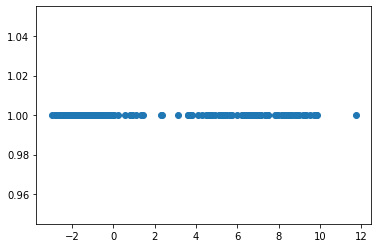

In [129]:
plt.scatter(X, np.ones(200))

In [130]:
n = len(X)
k = 2
s = 1 # sigma
mew = np.random.normal(size=(k,1))
sig = np.random.normal(size=(k,1))
c = np.sign(np.random.normal(size=(n,1)))
phi = np.random.normal(size=(n,k))
phi = phi/np.sum(phi, axis=1)[:, None]




In [131]:
def elbo(mew, sig, phi, X):
    log_var = np.log(2 * np.pi * sig)
    neg_kl_mu = 0.5 * np.sum(log_var) - k/2 * np.log(2*np.pi * s**2)
    
    phi_entropy = -np.multiply(phi, np.log(phi))
    neg_kl_phi = -n * np.log(k) + np.sum(phi_entropy)
    
    mu_x = X @ mew.T
    mu_sq = 0.5 * (np.multiply(mew, mew) + np.multiply(sig, sig))
    conditional = np.sum(np.multiply(phi, mu_x - mu_sq.T))
    
    return conditional + neg_kl_phi + neg_kl_mu

In [132]:
NUM_IT = 200

In [133]:
for l in range(NUM_IT):
    mu_x = X @ mew.T
    mu_sq = 0.5 * (np.multiply(mew, mew) + np.multiply(sig, sig))
    phi = np.exp(mu_x - mu_sq.T)
    phi = phi/np.sum(phi, axis=1)[:, None]
    
    for j in range(k):
        denom = 1/(s**2) + np.sum(phi[:, j])
        mew[j] = (phi[:, j] @ X)/denom
        sig[j] = 1/denom
    print(elbo(mew, sig, phi, X))
    

        
            

738.819010262171
2182.493648105488
2230.2871115705507
2230.482726715458
2230.4850479964266
2230.4851479036574
2230.4851527474766
2230.4851529837656
2230.4851529952953
2230.4851529958587
2230.4851529958864
2230.4851529958873
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
2230.485152995888
22

In [137]:
np.argmax(phi,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [138]:
mew

array([[ 6.82265632],
       [-0.9712288 ]])